<a href="https://colab.research.google.com/github/ivan0054/TP-Final--Claudio-Pavon/blob/augusto-b1/TP_Final_Claudio_Pavon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data_TF (1).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,NaN,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,NaN,1.0,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0.0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0.0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0.0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


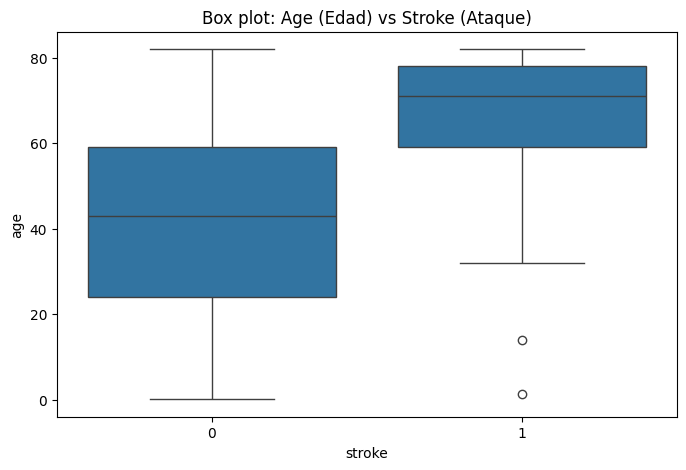

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Box plot: Age (Edad) vs Stroke (Ataque)')
plt.show()

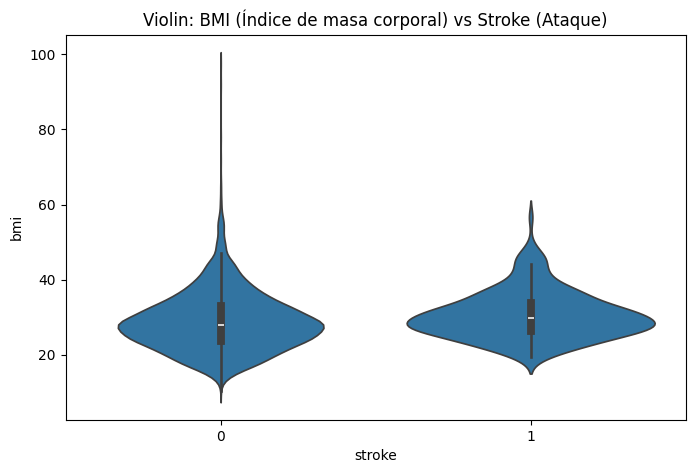

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='stroke', y='bmi', data=df)
plt.title('Violin: BMI (Índice de masa corporal) vs Stroke (Ataque)')
plt.show()

In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                4957 non-null   float64
 3   hypertension       4855 non-null   float64
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4398 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 479.2+ KB


(None,
                  id          age  hypertension  heart_disease  \
 count   5110.000000  4957.000000   4855.000000    5110.000000   
 mean   36517.829354    43.198305      0.100309       0.054012   
 std    21161.721625    22.607355      0.300442       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.000000  4398.000000  5110.000000  
 mean          106.147677    28.904388     0.048728  
 std            45.283560     7.858096     0.215320  
 min            55.120000    10.300000     0.000000  
 25%            77.245000    23.600000     0.000000  
 50%            91.885000    28.050000     0.000000  
 75%           114.

In [ ]:
df.drop(columns='id', inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
gender,0
age,153
hypertension,255
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,712
smoking_status,0


In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0], inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
print("\nValores nulos después de la verificación:")
print(df.isnull().sum())


Valores nulos después de la verificación:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


/tmp/ipython-input-8-769597053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-8-769597053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr